## 모델 튜닝

In [1]:
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
# 1000개 데이터를 미니배치로 추출해서 15회 학습하는 것으로 설정
history = network.fit(features_train, # 특성
                      target_train, # 타깃
                      epochs=15, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=1000, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터
print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 0s 18us/step - loss: 0.5944 - accuracy: 0.6903 - val_loss: 0.4834 - val_accuracy: 0.7972
Epoch 2/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.4329 - accuracy: 0.8233 - val_loss: 0.3947 - val_accuracy: 0.8355
Epoch 3/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.3697 - accuracy: 0.8488 - val_loss: 0.3566 - val_accuracy: 0.8509
Epoch 4/15
25000/25000 [==============================] - 0s 15us/step - loss: 0.3417 - accuracy: 0.8581 - val_loss: 0.3411 - val_accuracy: 0.8559
Epoch 5/15
25000/25000 [==============================] - 0s 14us/step - loss: 0.3241 - accuracy: 0.8658 - val_loss: 0.3908 - val_accuracy: 0.8299
Epoch 6/15
25000/25000 [==============================] - 0s 14us/step - loss: 0.3191 - accuracy: 0.8679 - val_loss: 0.3436 - val_accuracy: 0.8528
Epoch 7/15
25000/25000 [==============================] - 0s 14us/st

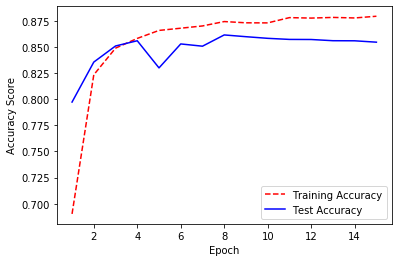

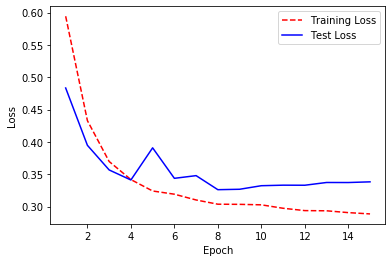

In [6]:
# 훈련 정확도와 테스트 정확도 기록을 저장합니다.
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Accuracy')
# plt.legend(['train','test'], loc='upper left')
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy Score")
# plt.show()

training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

training_loss = history.history["loss"]
test_loss = history.history['val_loss']

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

## 가중치 규제로 과대적합 줄이기

In [34]:
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
#                          kernel_regularizer='l1_l2',
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
# 층의 매개변수로 kernel_regularizer=regularizers.ㅣ2(0.01)를 지정하여 가중치 규제
# 0.01은 가중치가 큰 모델 파라미터 값에 얼마나 패널티를 부여할지를 결정함
# l1, l2 규제 동시 :l1_l2(l1=0.01,l2=0.01), 기본값을 사용 : l1_l2
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
#                          kernel_regularizer='l1_l2',
                         activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 46us/step - loss: 0.6483 - accuracy: 0.8150 - val_loss: 0.4981 - val_accuracy: 0.8510
Epoch 2/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.4689 - accuracy: 0.8533 - val_loss: 0.4509 - val_accuracy: 0.8552
Epoch 3/15
25000/25000 [==============================] - 1s 46us/step - loss: 0.4408 - accuracy: 0.8556 - val_loss: 0.4432 - val_accuracy: 0.8478
Epoch 4/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.4272 - accuracy: 0.8533 - val_loss: 0.4315 - val_accuracy: 0.8498
Epoch 5/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.4172 - accuracy: 0.8570 - val_loss: 0.4384 - val_accuracy: 0.8409
Epoch 6/15
25000/25000 [==============================] - 1s 42us/step - loss: 0.4115 - accuracy: 0.8552 - val_loss: 0.4192 - val_accuracy: 0.8477
Epoch 7/15
25000/25000 [==============================] - 1s 41us/st

## 조기종료로 과대적합 줄이기

In [37]:
# 케라스에서 콜백 함수로 조기 종료를 구현
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 훈련을 조기 종료하고 최선의 모델을 저장하기 위해 콜백 함수를 설정합니다.
# EarlyStopping(monitor="val_loss", patience=2)을 추가하여 에폭마다 테스트 
# (검증) 손실을 감시하여 연속적으로 2 에폭 동안 테스트 손실이 향상되지 않으며
# 훈련을 멈춤
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      callbacks=callbacks, # 조기 종료
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 1s 51us/step - loss: 0.4144 - accuracy: 0.8196 - val_loss: 0.3451 - val_accuracy: 0.8519
Epoch 2/15
25000/25000 [==============================] - 1s 41us/step - loss: 0.3227 - accuracy: 0.8655 - val_loss: 0.3289 - val_accuracy: 0.8610
Epoch 3/15
25000/25000 [==============================] - 1s 42us/step - loss: 0.3106 - accuracy: 0.8684 - val_loss: 0.3359 - val_accuracy: 0.8543
Epoch 4/15
25000/25000 [==============================] - 1s 43us/step - loss: 0.3017 - accuracy: 0.8729 - val_loss: 0.3281 - val_accuracy: 0.8576
Epoch 5/15
25000/25000 [==============================] - 1s 42us/step - loss: 0.2917 - accuracy: 0.8784 - val_loss: 0.3411 - val_accuracy: 0.8506
Epoch 6/15
25000/25000 [==============================] - 1s 41us/step - loss: 0.2814 - accuracy: 0.8818 - val_loss: 0.3335 - val_accuracy: 0.8566


모델 성능 :
25000/25000 [==============================] - 1s 28us/ste

## 드롭아웃으로 과대적합 줄이기

In [40]:
# 매우 다양한 네트워크 구조에서 수행할 수 있는 모델 파라미터 값을 학습하도록
# 유닛을 강제 - 은닉 유닛에 있는 잡음에 영향을 받지 않도록 학습되고 네트워크가
# 훈련 데이터를 단순히 암기하지 못하도록 함
# 일반적을 선택하는 드롭될 유닛의 비율은 입력유닛에서 0.2, 은닉유닛에서 0.5

import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# 영화 리뷰 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 영화 리뷰 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()

# 입력층으로 드롭아웃 층을 추가합니다.
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 렐루 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=16, activation="relu"))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가합니다.
network.add(layers.Dense(units=1, activation="sigmoid"))

# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop", # 옵티마이저
                metrics=["accuracy"]) # 성능 지표

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      verbose=1, # 출력 없음
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# # 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# # 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)

print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 65us/step - loss: 0.6269 - accuracy: 0.6333 - val_loss: 0.4818 - val_accuracy: 0.8248
Epoch 2/15
25000/25000 [==============================] - 2s 60us/step - loss: 0.5046 - accuracy: 0.7594 - val_loss: 0.3790 - val_accuracy: 0.8468
Epoch 3/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.4464 - accuracy: 0.7999 - val_loss: 0.3535 - val_accuracy: 0.8551
Epoch 4/15
25000/25000 [==============================] - 1s 58us/step - loss: 0.4300 - accuracy: 0.8158 - val_loss: 0.3399 - val_accuracy: 0.8593
Epoch 5/15
25000/25000 [==============================] - 1s 57us/step - loss: 0.4132 - accuracy: 0.8270 - val_loss: 0.3414 - val_accuracy: 0.8578
Epoch 6/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.4088 - accuracy: 0.8294 - val_loss: 0.3350 - val_accuracy: 0.8596
Epoch 7/15
25000/25000 [==============================] - 1s 58us/st

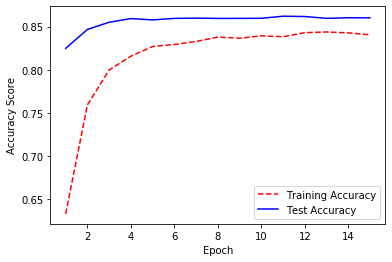

In [41]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

## 모델 훈련 진행 과정을 저장하기

In [44]:
# 라이브러리를 임포트합니다.
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 랜덤 시드를 설정합니다.
np.random.seed(0)

# 필요한 특성 개수를 지정합니다.
number_of_features = 1000

# IMDB 영화 데이터에서 훈련 데이터와 타깃 벡터를 로드합니다.
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# IMDB 데이터를 원-핫 인코딩된 특성 행렬로 변환합니다.
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# 신경망 모델을 만듭니다.
network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, 
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=1, activation="sigmoid"))


# 신경망의 모델 설정을 완료합니다.
network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                optimizer="rmsprop",        # 옵티마이저
                metrics=["accuracy"])       # 성능 지표

# 조기 종료
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# 신경망을 훈련합니다.
history = network.fit(features_train, # 특성
                      target_train, # 타깃 벡터
                      epochs=15, # 에포크 횟수
                      callbacks=callbacks, # 조기 종료
                      verbose=1, # 에포크 과정을 출력합니다.
                      batch_size=100, # 배치의 샘플 개수
                      validation_data=(features_test, target_test)) # 테스트 데이터

# 훈련 손실과 테스트 손실의 기록을 저장합니다.
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(training_accuracy) + 1)     
     
print('\n')
print('모델 성능 :')
print(network.evaluate(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 65us/step - loss: 0.7930 - accuracy: 0.6482 - val_loss: 0.5469 - val_accuracy: 0.8402
Epoch 2/15
25000/25000 [==============================] - 1s 58us/step - loss: 0.5648 - accuracy: 0.7914 - val_loss: 0.4587 - val_accuracy: 0.8502
Epoch 3/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.5232 - accuracy: 0.8118 - val_loss: 0.4500 - val_accuracy: 0.8540
Epoch 4/15
25000/25000 [==============================] - 1s 60us/step - loss: 0.5121 - accuracy: 0.8140 - val_loss: 0.4257 - val_accuracy: 0.8573
Epoch 5/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.5013 - accuracy: 0.8178 - val_loss: 0.4377 - val_accuracy: 0.8535
Epoch 6/15
25000/25000 [==============================] - 1s 59us/step - loss: 0.5002 - accuracy: 0.8164 - val_loss: 0.4221 - val_accuracy: 0.8567
Epoch 7/15
25000/25000 [==============================] - 2s 60us/st

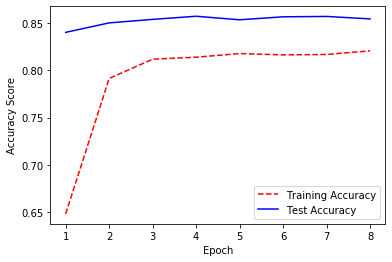

In [45]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 정확도 그래프를 그립니다.
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [46]:
# 신경망 모델 저장
network.save('model.h5')

In [47]:
from keras.models import load_model
network = load_model('model.h5')
network.evaluate(features_test, target_test)

25000/25000 [==============================] - 1s 35us/step


[0.42209520350456237, 0.8544800281524658]